<a href="https://colab.research.google.com/github/williamokomba/DSC6-week-8-indepedent-project/blob/main/DSC6_week_8_William_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Moringa Data science core week 8 Independent project: William**

##*1.0* Defining the Question

**Dataset provided**

* Healthcare dataset : [link](http://bit.ly/hypothyroid_data)

Dataset Columns

* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4

description for other features are not given, therefore we will assume y be Yes, n as No, f as False, and t as True.

###1.1 Specifying the data analytic question

The main aim of the project is to determines whether or not the patient's symptoms indicate that the patient has hypothyroid

###1.2 Defining the metric for success

Identifying the vital factors in identifying hypothyroidisms and achieving a high accuracy score on the prediction

### 1.3 Understanding the Context

Nairobi hospital carried out a clinical camp to test for hypothyroidism. The target population was patients suffering from the Thyroid disease

### 1.4 Recording the Experimental Design

* load libraries and dataset
* clean dataset:
* deal with duplicate and/or missing values
* deal with outliers, where necessary
* deal with other anomalies in the data, where necessary
* carry out exploratory data analysis
* carry out feature engineering
* modeling
  * Random Forest Classifier
  * Ada Boost Classifier
  * Gradient Boosting Classifier
  * Support Vector Classifier
* Tuning the best model
* challenge the solution
* summarize and provide recommendations

### 1.5 Assessing the Relevance of the Data

the data rellevant as it has all data and values only done in the hospital enviroment.



## 2.Loading and reading Our Datasets

In [127]:
# Importing standard libraries
#
# load pandas
import pandas as pd               # library for data manipulation and analysis
#
# load numpy
import numpy as np                # library for performin scientific computations
#
# load matplotlib.pyplot
import matplotlib.pyplot as plt   # library for creating basic visualisations
#
# load Seaborn
import seaborn as sns             # library for creating rich data visualisa
#
import pandas_profiling as pp
#
%matplotlib inline

In [128]:
#reading the dataset
#
health=pd.read_csv("http://bit.ly/hypothyroid_data")

## 3. Checking the Data

In [129]:
# Determining the no. of records in our health dataset
#
health.shape

(3163, 26)

**Observation** our dataset has 3163 records and 26 variables

In [130]:
# Previewing the top rows of our health dataset
#
health.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [131]:
# Previewing the bottom rows of our health dataset
#
health.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


**observation** the health dataset is uniform from top to the bottom.

In [132]:
# Checking on whether each column of result dataset has an appropriate datatype
#
health.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

**observation**: All the data types are Object hence we will need to transform the variables since we cannot run a model using this data type.

In [133]:
#5.1b concise information about dataset
#
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

**observation** all variables has 3163 recored. this is a hind that there is no null values.

In [134]:
#summary statistics of the dataset
#
health.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


**Observation**: there is a unique characters(?) in varius variables which need to be addressed.

In [135]:
# Checking for unique values in all variables in the dataset
#
# Checking for unique values in all columns in the dataset
for uni in health.columns:
  print(health[uni].unique())

['hypothyroid' 'negative']
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
['M' 'F' '?']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['y' 'n']
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50'
 '14' '60' '1

**observation**: We are able to single out unique features for each colunms/variable.

## 4. External Data Source Validation

### a. Validation

In [136]:
health.age.unique()

array(['72', '15', '24', '77', '85', '64', '20', '42', '69', '75', '53',
       '59', '68', '50', '78', '65', '28', '43', '40', '84', '?', '83',
       '63', '73', '36', '27', '48', '71', '60', '34', '79', '62', '74',
       '32', '41', '70', '29', '5', '58', '35', '51', '22', '16', '44',
       '39', '47', '18', '17', '88', '56', '30', '45', '66', '52', '54',
       '80', '33', '38', '92', '67', '46', '13', '89', '61', '49', '26',
       '57', '31', '90', '81', '25', '37', '76', '87', '23', '55', '86',
       '98', '21', '97', '1', '6', '14', '82', '11', '19', '9', '12',
       '10', '8', '7', '4', '93'], dtype=object)

**observation** the age range is correct. thus the dataset is valid.

## 5. Tidying the Dataset 

In [137]:
#making a copy to be used for data tidying.
#
health1=health.copy();
#
#preview of the copy dataset
#
health1.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [138]:
#Identifying the Missing Data
#
health1.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

**observartion** there is no missing values in the dataset. 

However, there is a character(?) in some variables which we will replace it with null values then impute them.




In [139]:
# Replacing the ? with missing values
#
health1.replace('?',np.nan,inplace=True)

In [140]:
# Checking the missing(null) values after replacing the ? with nan
#
health1.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

**observations**: there are alot of missing values. there is a need to handle them colunm by colunm

In [141]:
#converting the data to the correct datatype- float
#
health1[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]] = health1[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]].astype(float)
#
#converting categorical variables to the correct datatype-category
#
health1[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] = health1[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]].astype('category')
#
#Checking out the precise summary to see if the datatype changes have taken effect.
#
health1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        2717 non-null   float64 
 2   sex                        3090 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   category
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

**observation**: the data type are appropriate now and there is a clue that we have null values.

**dealing with null values**


In [142]:
# Filling the missing values in the age   with mean
#
health1['age']= health1['age'].fillna(health1['age'].mean(), axis = 0)

**observation**: we used mean since age variable is a continous variable.

In [143]:
#filling the missing values in the sex variable with mode
#
health1.fillna({'sex': health1['sex'].mode()[0]}, inplace=True)

**observation**: we used mean since sex variable is a categorical variable.

In [144]:
# filling the measured variables with 0
#
measured_col = ['TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']
#
health1[measured_col]=health1[measured_col].fillna(0)

**observation**: where the test were not taken/measured, there were null values. the entry should be zero thus we use fillna function.

In [145]:
#checking for null values after adjustments
#
health1.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

**observation**: all the missing values have been eliminated.

In [146]:
#confirming there is no missing values
#
health1.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

**observation**:  there is no missing values in our dataset.

In [147]:
# checking for duplicates
#
health1.duplicated().sum()

77

**observation**: there are 77 duplicates.

In [148]:
#dropping the duplicates
#
health1.drop_duplicates(inplace = True)
#
#confirming there is no duplicates
#
health1.duplicated().any()

False

**observation**: all duplicates has been dropped.

In [149]:
health1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


In [150]:
health1.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

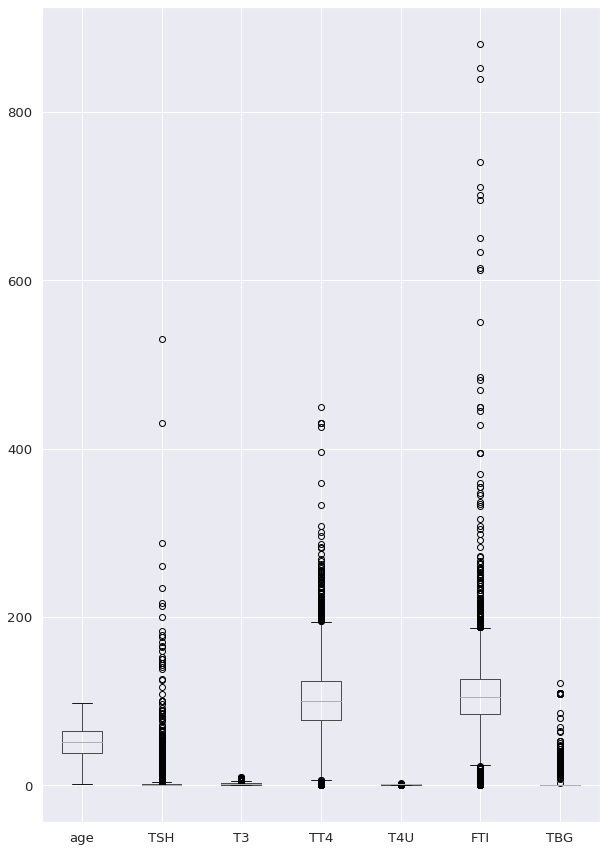

In [151]:
# Checking for Outliers
#
plt.figure(figsize = (10, 15))
health1.boxplot()
plt.show()



**Observation**: there are alot of outliers on variables like TSH,T3,TT4, T4U,FTI and TBG. However we will not remove then now. we'll remove them  when building SVM model.

In [152]:
# standardizing variable names for readability
#
health1.columns = health1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#
#cleaned dataset
health2= health1.copy()
health2.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


##6. Exploratory Data Analysis

### 6a. Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.

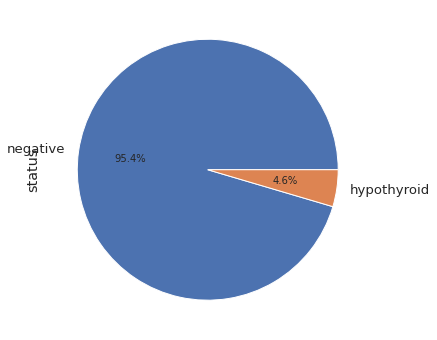

In [153]:
#univariate analysis: status variable piechart
#
plt.figure(figsize = (6, 6))
health2.status.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

**obersation**: Majority of the respodents turned out to be negative.

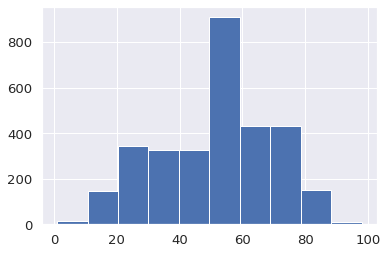

In [154]:
# univariate analysis: age variable histogram
#
health2.age.hist()
plt.show()

**observation** :distribution of age is close to normal distribution. there were more records 55 to 60 year. meaning these were the most respodents.

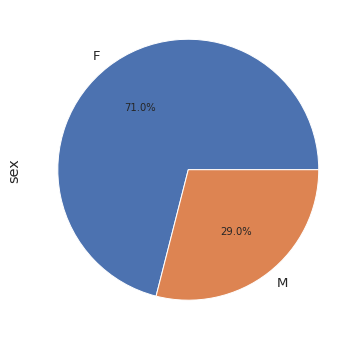

In [155]:
#univariate analysis: sex variable histogram
#

plt.figure(figsize = (6, 6))
health2.sex.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

**observation**: majority of the respodents were female.

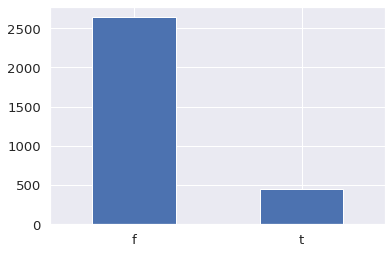

In [156]:
# univariate analysis: on_thyroxine variable bar graph
#
health2.on_thyroxine.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation** most of the respodents  were not on on_thyroxine

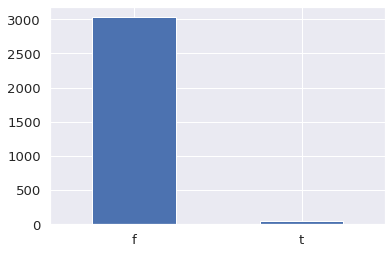

In [157]:
# univariate analysis: query_on_thyroxine variable bar graph
#
health2.query_on_thyroxine.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**obsersation**:  there was less query on thyroxine

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


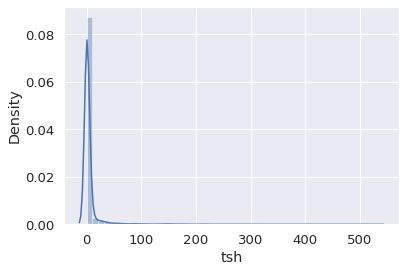

In [158]:
# univariate analysis: tsh variable distplot
#
plt.figure(figsize = (6, 4))
sns.distplot(health2.tsh);


**observation**: the distribution is close to normal. this might be attributed to the 0 we replaced with null values.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


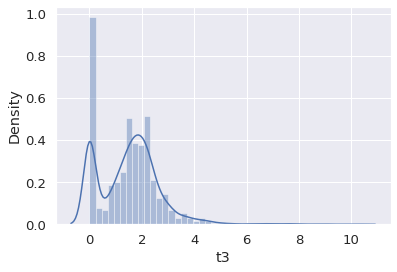

In [159]:
plt.figure(figsize = (6, 4))
sns.distplot(health2.t3);

**observation**: the distribution is close to normal. this might be attributed to the 0 we replaced with null values.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


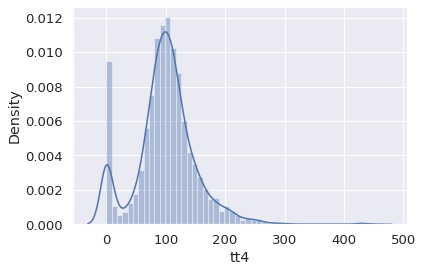

In [160]:
plt.figure(figsize = (6, 4))
sns.distplot(health2.tt4);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


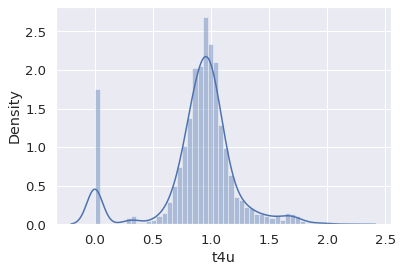

In [161]:
plt.figure(figsize = (6, 4))
sns.distplot(health2.t4u);

**observation**: the distribution is close to normal. this might be attributed to the 0 we replaced with null values. this is evident at 0 bin.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


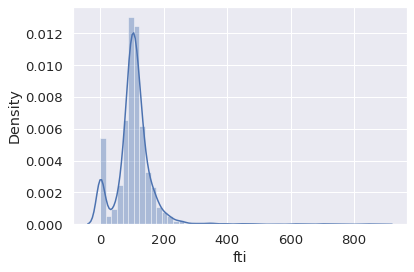

In [162]:
plt.figure(figsize = (6, 4))
sns.distplot(health2.fti);

**observation**: the distribution is close to normal. this might be attributed to the 0 we replaced with null values.this can be confirmed at 0 bin.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


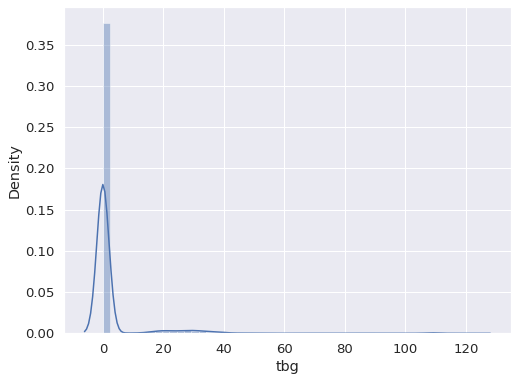

In [163]:
plt.figure(figsize = (8, 6))
sns.distplot(health2.tbg);

**observation**: the distribution is close to normal. this might be attributed to the 0 we replaced with null values.this can be confirmed at 0 bin.

### 6b. Bivariate analysis

We now perform bivariate analysis, which is a type of analysis that involves two variables. The main objective is to understand the relationships between these two types of variables

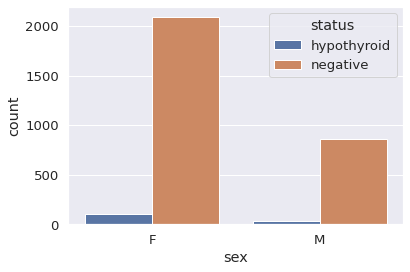

In [164]:
# status by sex
sns.countplot(x = 'sex', hue = 'status', data = health2)
plt.show()

**observation**: female had higher negative result for hypothyroid than men.

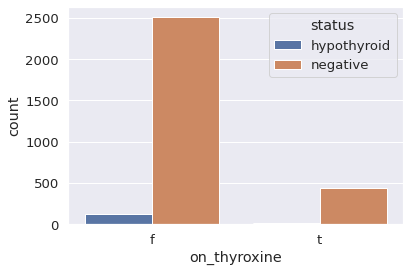

In [165]:
sns.countplot(x = 'on_thyroxine', hue = 'status', data = health2)
plt.show()

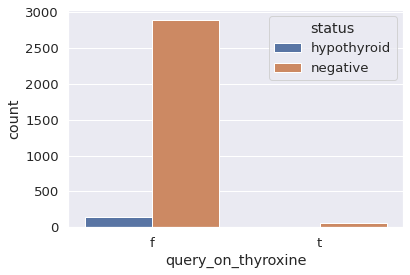

In [166]:
sns.countplot(x = 'query_on_thyroxine', hue = 'status', data = health2)
plt.show()

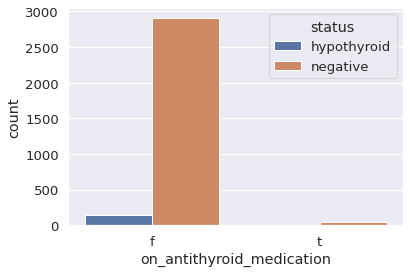

In [167]:
sns.countplot(x = 'on_antithyroid_medication', hue = 'status', data = health2)
plt.show()

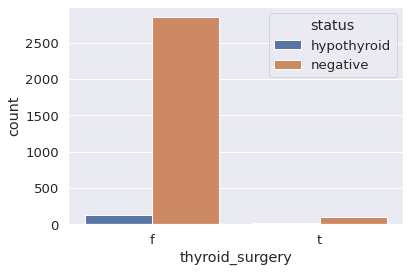

In [168]:
sns.countplot(x = 'thyroid_surgery', hue = 'status', data = health2)
plt.show()

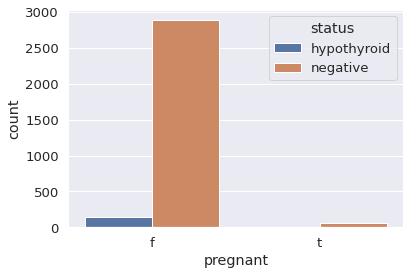

In [169]:
sns.countplot(x = 'pregnant', hue = 'status', data = health2)
plt.show()

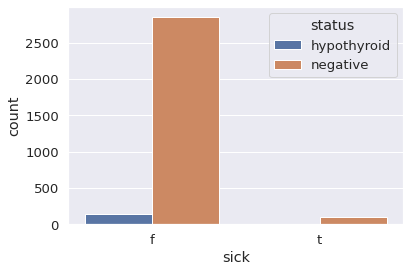

In [170]:
sns.countplot(x = 'sick', hue = 'status', data = health2)
plt.show()

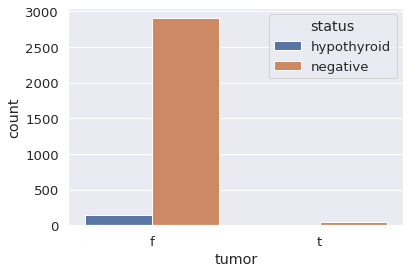

In [171]:
sns.countplot(x = 'tumor', hue = 'status', data = health2)
plt.show()

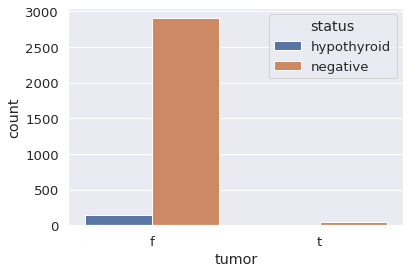

In [172]:
sns.countplot(x = 'tumor', hue = 'status', data = health2)
plt.show()

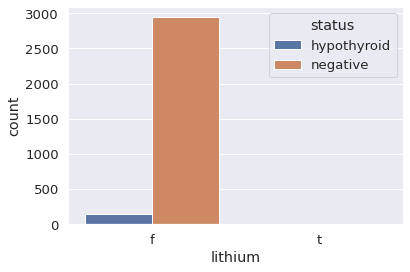

In [173]:
sns.countplot(x = 'lithium', hue = 'status', data = health2)
plt.show()

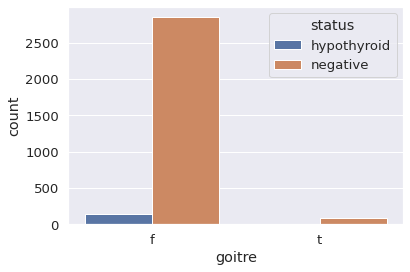

In [174]:
sns.countplot(x = 'goitre', hue = 'status', data = health2)
plt.show()

**Observation** all the above bar graph shows higher negative hythroproid result to all the corespodent who turned false on other tests that wer carried out.



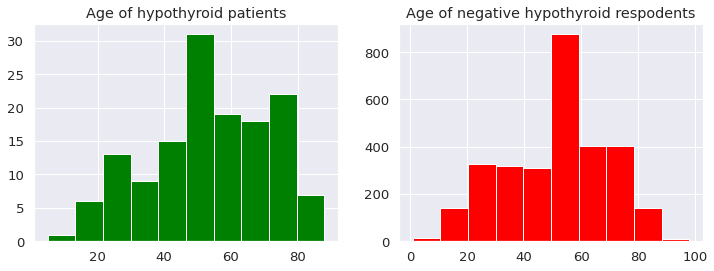

In [175]:
# status by age
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# age when status = hypothyroid
plt.subplot(1, 2, 1)
health2.loc[health2.status == 'hypothyroid'].age.hist(color = 'green')
plt.title("Age of hypothyroid patients")

# age when status = negative
plt.subplot(1, 2, 2)
health2.loc[health2.status == 'negative'].age.hist(color = 'red')
plt.title("Age of negative hypothyroid respodents")

plt.show()

**observation**: There doesn't seem to be a significant difference in the ages of those with hypothyroid and those who tested negative for hypothyroid.

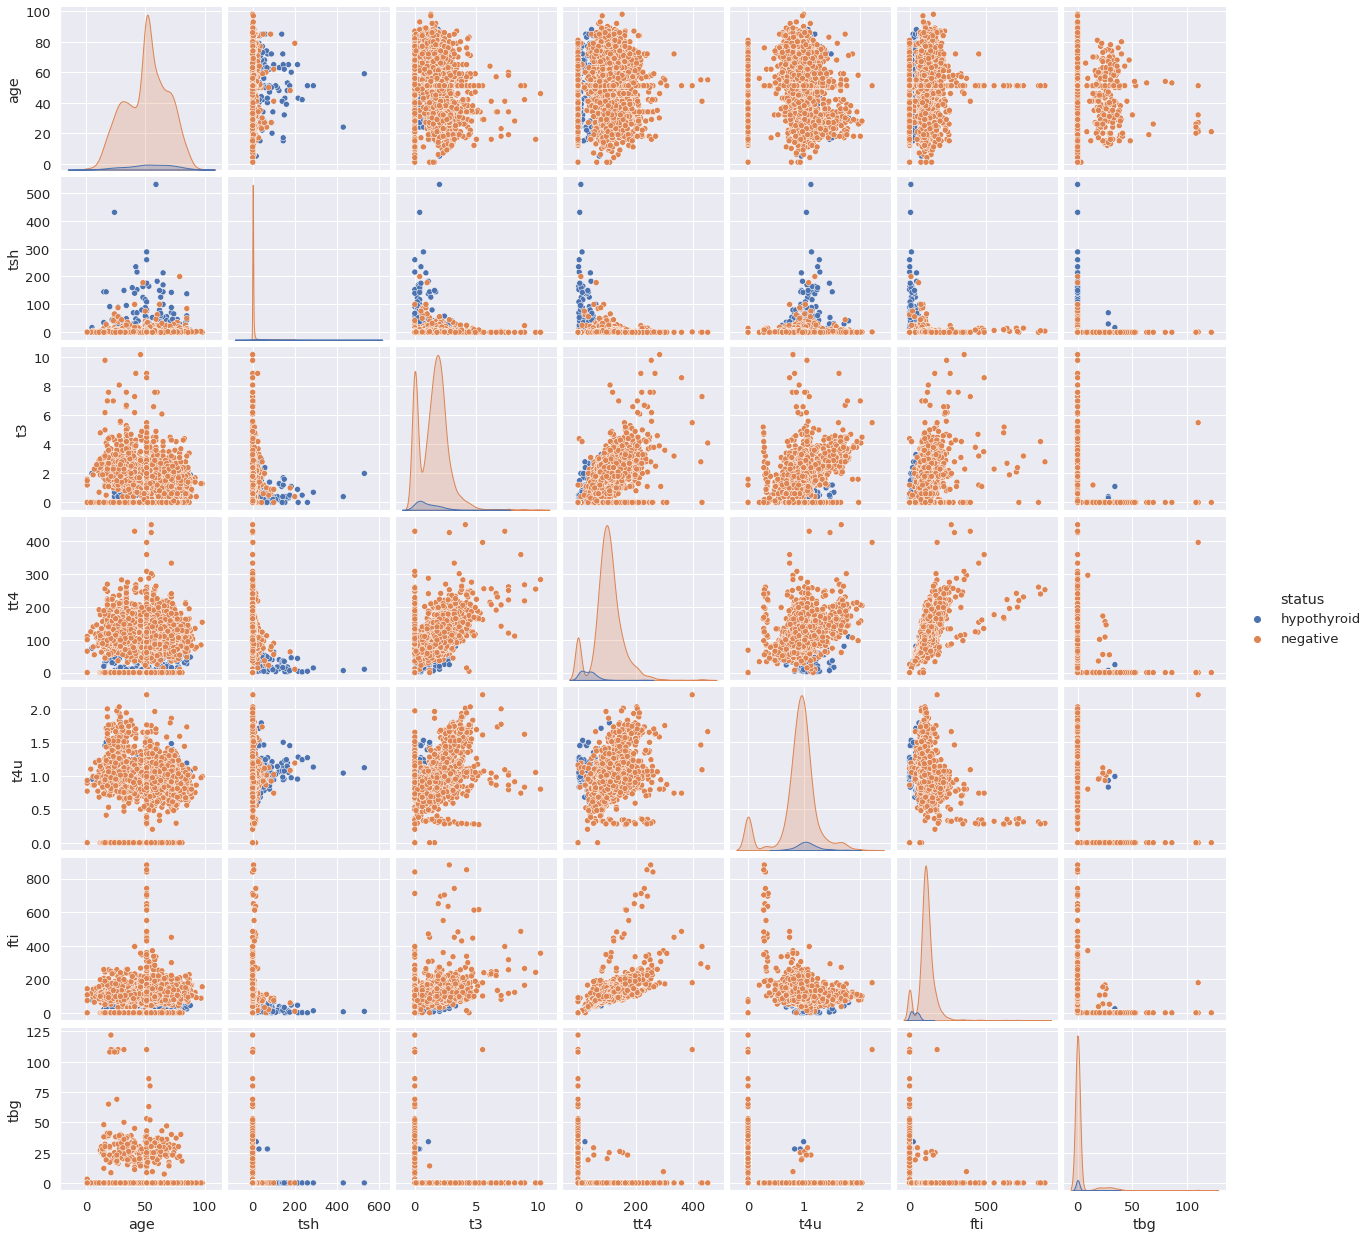

In [176]:
# Plotting pairplot for health dataset
#

sns.pairplot(health2,kind="scatter", diag_kind="kde", hue="status")

**observation**: The pairplot shows that TSH plotted against other variables offers a fairly good distnint of the target variable classes.
also the variable are not linear.

In [177]:
# Computing the correlation matrix 
#
# This is the association between numerical variables in the dataset
#
health2.corr()

,age,tsh,t3,tt4,t4u,fti,tbg
age,1.000000,0.011431,-0.074543,-0.000089,-0.024815,0.074604,-0.132861
tsh,0.011431,1.000000,-0.083445,-0.219696,0.096258,-0.183648,-0.050415
t3,-0.074543,-0.083445,1.000000,0.493887,0.455964,0.326356,-0.300469
tt4,-0.000089,-0.219696,0.493887,1.000000,0.600486,0.758395,-0.441241
t4u,-0.024815,0.096258,0.455964,0.600486,1.000000,0.196093,-0.612819
fti,0.074604,-0.183648,0.326356,0.758395,0.196093,1.000000,-0.384513
tbg,-0.132861,-0.050415,-0.300469,-0.441241,-0.612819,-0.384513,1.000000


**observation**: the correlation will be explained in the heatmap because it is the same observations.

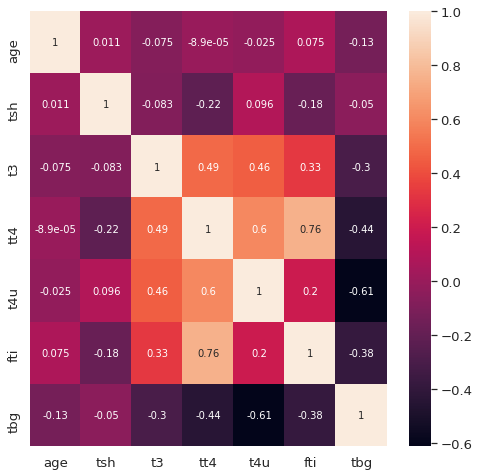

In [178]:
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (8, 8))
sns.heatmap(health2.corr(), annot=True, );

observation: The strongly positive correlated between  t4u & tt4 and between fti and tt4.

## 7. Feature engineering

In [179]:
#converting strings to numerical values using mapping function.
#
#getting the copy of the health2 dataset
#
health3= health2.copy()
# Converting false and true values in the columns to numerical values using the map function.

false_true = ['on_thyroxine', 'sick', 'tumor', 'lithium', 'goitre','query_hypothyroid','query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hyperthyroid', 'pregnant']

false_true_mapping = {'f':0, 't':1}

for col in false_true:
  health3[col] = health3[col].map(false_true_mapping)

In [180]:
# Converting yes and no values in the columns to numerical values using the map function.
#
yes_no = ['tsh_measured','t3_measured','tt4_measured', 't4u_measured','fti_measured', 'tbg_measured']
#
yes_no_mapping = {'n':0, 'y':1}
#
for col in yes_no:
   health3[col] = health3[col].map(yes_no_mapping)

In [181]:
# Converting Male and Female values in the sex column to numerical values using the map function.
#
health3['sex'] =health3['sex'].map({'M':0, 'F':1})

In [182]:
#Converting Hypothyroid and negative values in the status column to numerical values using the map function.
#
health3['status'] = health3['status'].map({'hypothyroid': 1, 'negative': 0})

In [183]:
#confirming the mapping worked
#
health3.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


##8. modeling

In [184]:
#importing libraries to be used in modeling
#
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### **part 1: Decision Trees:**

#### 1. Random forests 

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees. 

The most important parameters to tune
* Maximum depth
* Minimum sample splits
* Node creation factor
* Number of features to use
* Number of trees to create

In [185]:
#preview of the dataset to be used
#
health3.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [186]:
# Splitting the independent and dependent variables
#
from sklearn.model_selection import train_test_split
#
#We want to predict whether or not the patient's symptoms indicate that the patient has hypothyroid (status)
#
# status is our target/dependent/label variable.
#
y = health3['status'].values
#
#converting the variable from categorical to numerical
#
y = health3.status.cat.codes
#
# We should be able to use all the other features/indepedent variable.
#
test_features = health3.columns.to_list()
test_features.remove('status')
#
X = health3[test_features].values

In [187]:
#splitting our dataset to training and test data
#
# Training the model using 80% of the data and testing it with 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**interpretaion**:

* X_train: independent/input feature for training the model
* y_train: dependent/ target/ output feature for training the model
* X_test: independent/input feature for testing the model,   will be used to predict the output value
* y_test: original depedent/output values of t-test, we'll compare this values with our predicted values to check the performance of our build model.
* train_ size= 80% of the data will go for train set will 20% for test. set.
* random_state= this fix the split i.e there will be the same split each time you ran the code.

In [188]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**observation**: this ensure the train and test variable are equal

In [189]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
#
# Fitting the randomforest classifier model features to the X_train and X_test
# 
forest = RandomForestClassifier(n_estimators = 300, random_state=42, min_samples_split=10, max_depth=5)

**observation**: The random_state variable is here to guarantee that we all see the same numbers.


In [190]:
#train the model
forest = forest.fit(X_train, y_train)

In [191]:
# Predict based on the model we've trained
#
y_pred = forest.predict(X_test)

In [192]:
# Getting the confusion matrix to evaluate the performance of the model
print(confusion_matrix(y_test,y_pred))

[[ 19   6]
 [  1 592]]


***observation***: 19 were correctly predicted and 1 incorrectly predicted in the 1st colunm. 592 were correctly predicted and 6 incorrectly predicted.

In [193]:
#importing sklearn metrics library
#
from sklearn import metrics
#
# Model Accuracy, checking classifier correctness.
#
print("Random Forest Accuracy: " ,metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy:  0.988673139158576


**observation**: the accuracy is 98.9%. this is very high a sign of overfitting.



In [194]:
#visualizing the decision trees, 30 trees
#
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

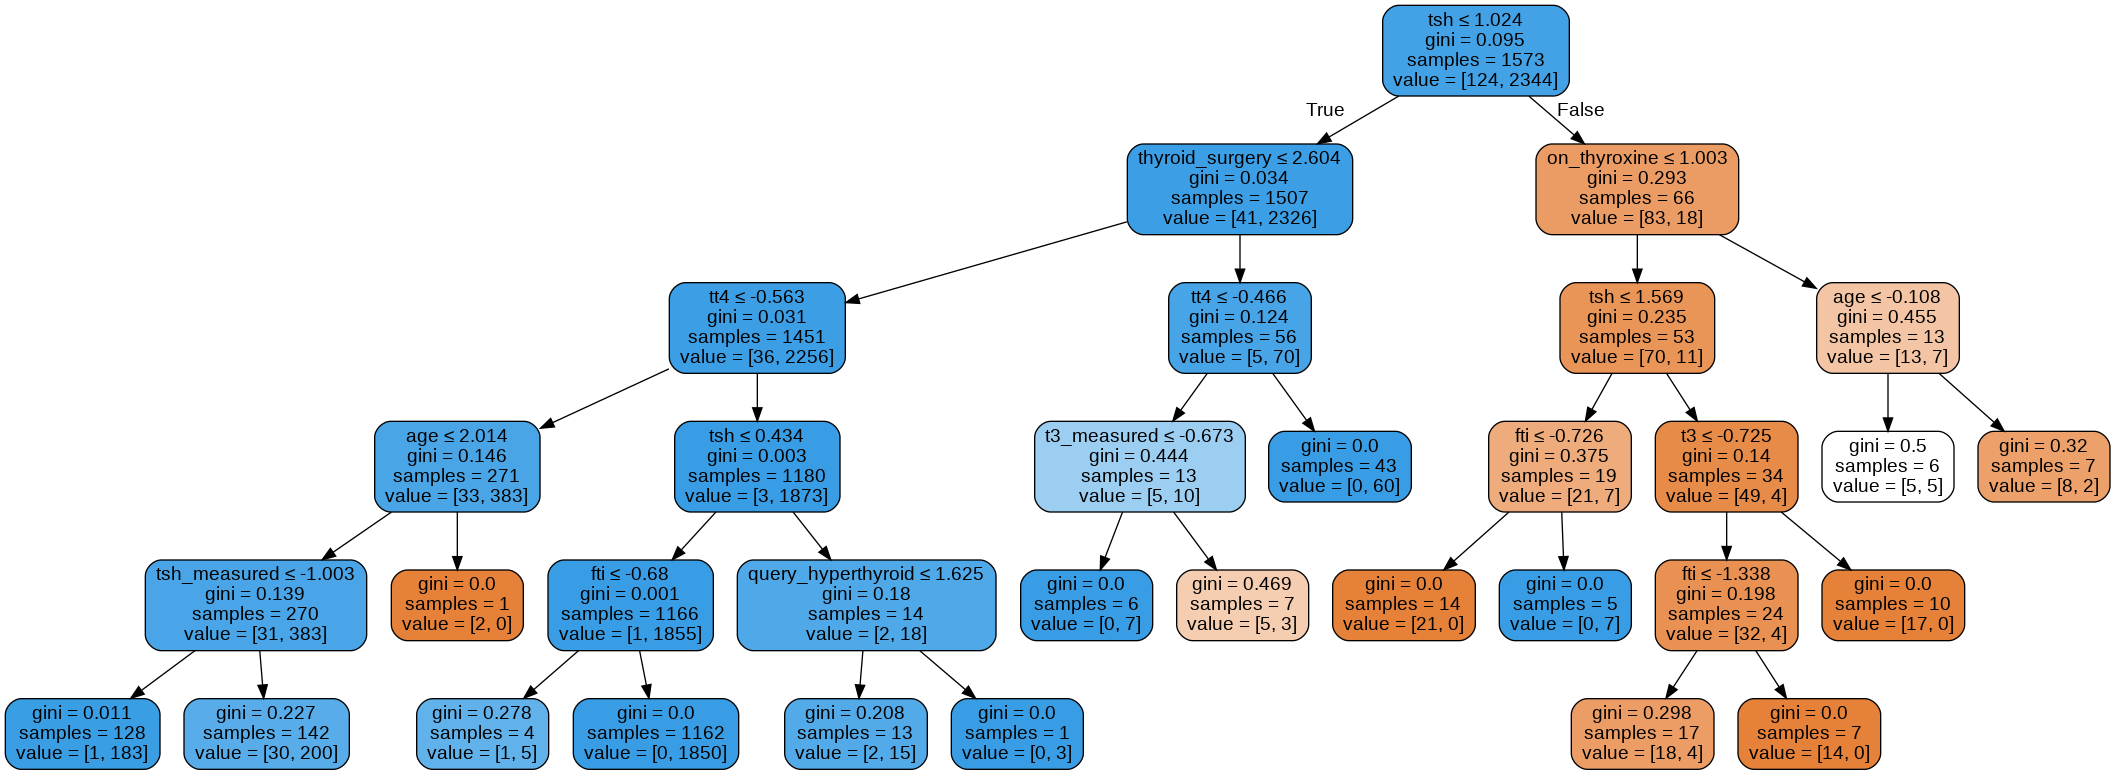

In [195]:
#Plotting the Decision tree
#
y_pred = forest.predict(X_test)
#
dot_data = StringIO()
#
# picking of a specific tree from the forest: tree  number 20
tree = forest.estimators_[20]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid .png')
Image(graph.create_png())

In [196]:
# Feature importance
#
#Get numerical feature importances
importances = list(tree.feature_importances_)


In [197]:
# using Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.



[('age', 0.03), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.02), ('tsh', 0.8), ('t3_measured', 0.02), ('t3', 0.0), ('tt4_measured', 0.0), ('tt4', 0.04), ('t4u_measured', 0.0), ('t4u', 0.0), ('fti_measured', 0.0), ('fti', 0.07), ('tbg_measured', 0.0), ('tbg', 0.0)]


In [198]:
# sorting the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
#
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tsh                  Importance: 0.8
Variable: fti                  Importance: 0.07
Variable: tt4                  Importance: 0.04
Variable: age                  Importance: 0.03
Variable: tsh_measured         Importance: 0.02
Variable: t3_measured          Importance: 0.02
Variable: on_thyroxine         Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: t3                   Importance: 0.0
Variable: tt4_measured         Importance: 0.0
Variable: t4u_measured         Importance: 0.0
Va

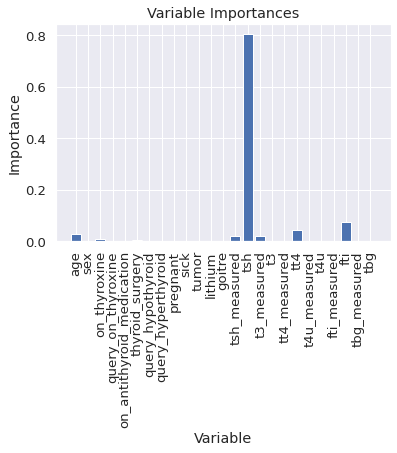

In [199]:
#the above can be represented visually
#
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
#
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**observation**:
* The plot shows the most important features in predicting whether a person is hypothyroid or not. only need 7 variables: tsh,fti, tt4,t3_measured,tsh_measured,on thyroxine and age.
* the most import feature is tsh test which accounts for 80% of the total feature importance.



In [200]:
# Using the 'tsh' feature only to build a prediction model
#
# Splitting the data into Features set and Labels
#
x=health3['tsh'].values.reshape(-1,1) # reshaping since it is one feature, this helps in training(fitting) the data.
y = health3['status'].values

#
# Splitting the data  into training and test sets   
# training data at 80%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [201]:
# Fitting the model

forest = RandomForestClassifier(n_estimators = 300, random_state=42, min_samples_split=10, max_depth=5)

forest = forest.fit(x_train, y_train)

In [202]:
#making predictions of the model
#
y_pred = forest.predict(x_test)

In [203]:
# Getting the confusion matrix to evaluate the performance of the model
print(confusion_matrix(y_test,y_pred))

[[585   8]
 [  6  19]]


**observation** 585 priction was done accurately in the 1st row and 6 were incorrectly predicted. 19 prediction was correct and 8 incorrect for the 2nd row.

In [204]:
# Model Accuracy, checking classifier correctness.
#
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9773462783171522


**observation**: 
* The model gives  97.7 accuracy using the most important feature tsh.
* This is lower compared to the model with all features.

####2.Ada boosted (Adaptive Boosting) Trees

* Ada-boost, like Random Forest Classifier is another ensemble classifier(Ensemble classifier are made up of multiple classifier algorithms and whose output is combined result of output of those classifier algorithms).

* Parameters to tune
  * Parameters of one initial tree
  * Number of trees to create



In [205]:
#previewing the dataset to use
#we will use the one we used in randomforest
#
healtha=health3.copy()
healtha.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [206]:
#splitting dataset into indepedent/features and depedent/target/label variable.
#
#getting depedent/target/label variable
#
X= healtha.drop('status', axis = 1)
#
#getting depedent/target/label variable
#
y = healtha['status'].values

In [207]:
# Encoding the target variable from strings to numericals
           
y = healtha.status.cat.codes

In [208]:
# Splitting the data into training and test data
#we will use training data of 80%
#
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state = 0)

In [209]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
#importing sklearn adaboast classifier model
#
from sklearn.ensemble import AdaBoostClassifier

In [211]:
#fitting the adaboost model

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=300)

In [212]:
#training the model
#
ada_boost=ada_boost.fit(X_train, y_train)


In [213]:
#making predictions of the model
#
y_pred = ada_boost.predict(X_test)

In [214]:
# Getting the confusion matrix to evaluate the performance of the model
print(confusion_matrix(y_test,y_pred))

[[  84   37]
 [   7 2341]]


**observation:** 93 prediction was done correctly and 7 incorrect in the 1st row and 2341 prediction done correctly and 28 incorrectly in the 2nd row.

In [215]:
#evaluating the accuracy of the model
#
print("Adaboost accuracy: ", metrics.accuracy_score(y_test, y_pred))

Adaboost accuracy:  0.9821790198460916


**observation**: The Ada Boost Classifier gives 98.6%. still is seesms the model is overfitting.

####3.Gradient Boosted Trees

This is machine learning technique for regression and classification problems. it make prediction on model in the form of an ensemble of weak prediction models, typically decision trees. it can can overfit a training dataset quickly.

However, It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

Parameters to tune

* Maximum depth
* Minimum sample splits
* Node creation factor
* Learning rate
* Number of trees to create

In [216]:
#preview of the dataset to be used
#
healthb=healtha.copy()
healthb.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [217]:
#splitting data into depedent/label/target and indepdent/features variables
#
X= healthb.drop('status', axis = 1)
#
y=healthb["status"]. values

In [218]:
# Encoding the target variable from strings to numericals
#          
y = healthb.status.cat.codes

In [219]:
# Splitting the data into training and test data
#
#training data will be 80%
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [220]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
#importing sklearn gradient boosting classifier model
#
from sklearn.ensemble import GradientBoostingClassifier

In [222]:
#fitting the adaboost model
#
#target tree number=300, learning rate=0.1, max depth= 3 and min_sample split =10
#
gbr = GradientBoostingClassifier(n_estimators= 300, learning_rate=0.1, max_depth=3,min_samples_split=10)

In [223]:
#training the model
#
gbr = gbr.fit(X_train, y_train)

In [224]:
#making the prediction of the model.
#
y_pred_gbr = gbr.predict(X_test)

In [225]:
# Getting the confusion matrix
print(confusion_matrix(y_test,y_pred_gbr ))

[[ 23   2]
 [  2 591]]


**observation**: 23 correct and 2 incorrect prediction on the 1st row and 591 correct and 2 incorrect prediction on the second row.

In [226]:
# Getting the confusion matrix to evaluate the performance of the model
#
print("Gradient boosted accuracy: ", metrics.accuracy_score(y_test, y_pred_gbr))

Gradient boosted accuracy:  0.9935275080906149


**observation**:  Gradient boost registered accuracy of 99% which is higher than of Random Forest Classifier.However, this might be overfitting.

## part 2: Support Vector Machine (SVM)
#
A Support Vector Machine (SVM) is a discriminative classifier  defined by a separating hyperplane.

the algorithm outputs an optimal hyperplane which categorizes the data values.

* Parameters to tune:
   * Kernel
   * C (cost function)
   * Gamma
   * Degree

In [227]:
#importing libraries to be used for SVM
#
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

### preparing data for SVM
* Further cleaning

In [228]:
#importing and ppreviewing saved dataset to be used
#
healthc = healthb.copy()
#
healthc.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [229]:
# dropping tbg colunms since i had alot of missing values at the initial check
#
healthc_drop=healthc.drop('tbg', axis=1, inplace=True)
#
#confirming the drop
#
healthc.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


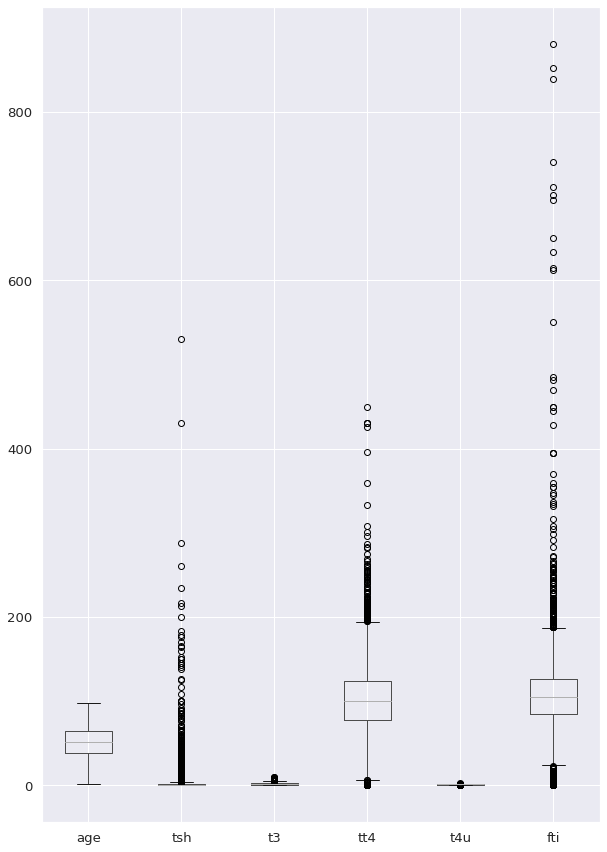

In [230]:
#checking for outliers
#
plt.figure(figsize = (10, 15))
healthc.boxplot()
plt.show()

**observation**: tsh,t3,tt4,fti variables have outliers.

In [231]:
#handling outlier
#
# we will use PCA to handle outliers as it is more rigorous forms of analysis that are more resistant to outliers
#at the same time we will be reducing the features by applying a reduction algorithm.
#this will help us to plot the graph on a 2-Dimencional plane
#
# splitting dataset into features/indepedent and target/label variable
#
hypothyroid = healthc.drop('status', axis=1)
#
#target/label variable
y = healthc['status']
#
#converting the variable from categorical to numerical
#
y = healthc.status.cat.codes
#
#importing sklearn PCA library
from sklearn.decomposition import PCA
#
#Applying the reduction algorithm: PCA to feature variables.
pca = PCA(n_components=2).fit(hypothyroid)
X = pca.transform(hypothyroid)
X.shape

(3086, 2)

In [232]:
#importing sklearn train_test_split library
from sklearn.model_selection import train_test_split
#
#splitting datasset into training and test data.
#i will assign 80% of data to training data.
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**observation**: this is the training and test data to be used in SVM.

#### Creating SVC using different kernels

##### 1. Polynomial kernel

In [233]:
#building model with poly kernel, c=1 and gamma =0.001
svc = SVC(kernel = 'poly', C = 1, degree=3, gamma = 0.001)

**Observation**

* kernel, quantify the similarity of 2 observations.
C = 1, this is the penalty parameter that represents misclassification or error term. tell tells SVM optimization how much error is bearable.
* gamma=0.001, measure how far each data points influence on the hyperplane
* degree=3

In [234]:
# Fitting the model: Polymomial function
#
svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [235]:
# predicting the model
y_pred_poly = svc.predict(X_test)

In [237]:
#evaluating the model accuracy
#
from sklearn.metrics import accuracy_score 

print("polyclassifier accuracy: ", metrics.accuracy_score(y_test, y_pred_poly))
#
#confusion matrix
#
print(confusion_matrix(y_test, y_pred_poly))

polyclassifier accuracy:  0.9627831715210357
[[  2  23]
 [  0 593]]


**observation**: kernel polyclassifier gives 96 accuracy and the there is 2 accurately and 0 wrongly prediction on colunm 1 and 593 correctly and 23 incorrectly prediction on colunm 2. this is a very good model.

#####2. Linear kernel

In [244]:
##building model with poly kernel, c=1 and gamma =0.001
#
svc = SVC(kernel = 'linear',  C = 1, degree=3, gamma = 0.001)
#
#fitting the model
svc.fit(X_train, y_train)
#
#predicting the model
y_pred_linear = svc.predict(X_test)



In [246]:
#evaluating the model accuracy
#
from sklearn.metrics import accuracy_score 

print(" SMV linear accuracy: ", metrics.accuracy_score(y_test, y_pred_linear))
#
#confusion matrix
#
print(confusion_matrix(y_test, y_pred_linear))

 SMV linear accuracy:  0.9578833693304536
[[  0  39]
 [  0 887]]


**observation**: SVM linear has 95.9% accuracy

##### 3. Radial basis function (rbf)

In [261]:
# building the model
#
svc = SVC(kernel = 'rbf', C = 1, degree=3, gamma = 0.001)


In [262]:
#fitting the model
#
svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [263]:
#predicting the model
#
y_pred_rbf = svc.predict(X_test)

In [264]:
#evaluating the model accuracy
#
from sklearn.metrics import accuracy_score 

print(" RBF linear accuracy: ", metrics.accuracy_score(y_test, y_pred_rbf))
#
#confusion matrix
#
print(confusion_matrix(y_test, y_pred_rbf))

 RBF linear accuracy:  0.9794816414686826
[[ 25  14]
 [  5 882]]


**observation**: RBF registered 98% accuracy.

##### kernel sigmoid
**note**: this is for my own practice and not part of the Ip

In [266]:
#fitting sigmoid model
#
sigmoid = SVC(kernel='sigmoid', C=1, degree=3, gamma=0.001)

# training the model
#
sigmoid.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [267]:
#predicting the model
#
y_pred_gsigmoid = sigmoid.predict(X_test)

In [268]:
# evaluate the model
print("Kernel sigmoid accuracy:",metrics.accuracy_score(y_test, y_pred_gsigmoid))

print(confusion_matrix(y_test, y_pred_gsigmoid))

Kernel sigmoid accuracy: 0.949244060475162
[[  0  39]
 [  8 879]]


**observation**:  it seems it was wrongly computed since it shows 0 correctly predicted and 8 wrongly prediction on the 1st row. i will check on it later.

#### conclusion

1. Under decision trees the random forest had the highest accuracy score of 98.9%.
2. Under the Support Vector Machine the RBF had the highest accuracy scoreof 98%.
3. The most important features to use for the prediction were TSH and TFI tests.
4. There were several instances of overfitting, this might be because of inadequate data.
5. Several regularization techniques were applied for example the C parameter in the Support Vector Classifier


######**Tuning Support Vector Classifier**

we can use randomiximed search to find the best parameters for the models.

In [272]:
#import sklearn randomizer library
#
from sklearn.model_selection import RandomizedSearchCV
#
params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma': [0.001, 0.01, 0.1, 1]}

svc = SVC()

search = RandomizedSearchCV(estimator = svc, 
                      param_distributions = params, 
                      scoring = 'accuracy',
                      n_jobs = 1, 
                      cv = 10 )

                
search.fit(X,y)
search.best_params_

{'C': 1, 'gamma': 0.01}

**observation**: the above are the best C and gamma. i might have continued to compute RBF using the 2 highet features that affects the target variable. 



##9. Follow up questions

1. Did we have the right data?
*  yes

2. Do we need other data to answer our question?
* we need more data to do away with overfitting.

3. Did we have the right question?
* yes